In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Placement/time series/store_sales.csv')

In [6]:
df.shape,df.head()

((1804, 6),
          Date   Price    Open    High     Low  Volume
 0  29/09/2015  1127.1  1132.4  1133.6  1123.9    0.25
 1  30/09/2015  1115.5  1127.5  1127.5  1111.3    0.28
 2  01/10/2015  1114.0  1114.9  1118.3  1111.0    0.26
 3  02/10/2015  1136.7  1113.0  1140.7  1105.0    0.47
 4  05/10/2015  1137.7  1138.7  1141.3  1129.8    0.20)

In [7]:
varlist=['Date','Price']

In [8]:
df_varlist=df[varlist]

In [9]:
df_varlist.dtypes

,0
Date,object
Price,float64


In [10]:
df_varlist['Date']=df_varlist['Date'].astype('object')

<ipython-input-10-c85bbfea591e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_varlist['Date']=df_varlist['Date'].astype('object')


In [11]:
df_varlist['Date']=pd.to_datetime(df_varlist['Date'],format='%d/%m/%Y')

<ipython-input-11-df1d12846e3f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_varlist['Date']=pd.to_datetime(df_varlist['Date'],format='%d/%m/%Y')


In [12]:
df_varlist.dtypes

,0
Date,datetime64[ns]
Price,float64


In [13]:
df_varlist.head()




,Date,Price
0,2015-09-29,1127.1
1,2015-09-30,1115.5
2,2015-10-01,1114.0
3,2015-10-02,1136.7
4,2015-10-05,1137.7


In [14]:
df_varlist.set_index('Date',inplace=True)

In [15]:
df_varlist.index

DatetimeIndex(['2015-09-29', '2015-09-30', '2015-10-01', '2015-10-02',
               '2015-10-05', '2015-10-06', '2015-10-07', '2015-10-08',
               '2015-10-09', '2015-10-12',
               ...
               '2022-07-11', '2022-07-12', '2022-07-13', '2022-07-14',
               '2022-07-15', '2022-07-18', '2022-07-19', '2022-07-20',
               '2022-07-21', '2022-07-22'],
              dtype='datetime64[ns]', name='Date', length=1804, freq=None)

In [16]:
df_varlist.describe()

,Price
count,1804.000000
mean,1480.877644
std,276.132747
min,1049.700000
25%,1257.225000
50%,1334.600000
75%,1787.750000
max,2054.600000


In [43]:
df_1=df_varlist

<Axes: xlabel='Date'>

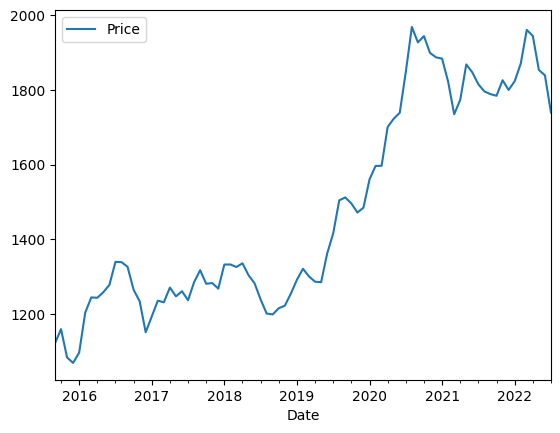

In [18]:
df_1.resample(rule='M').mean().plot()

<Axes: xlabel='Date'>

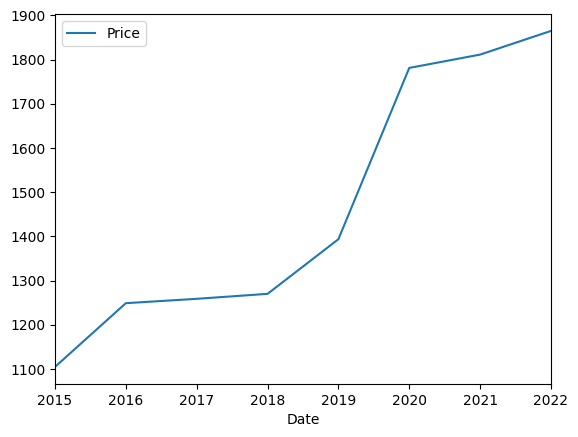

In [19]:
df_1.resample(rule='AS').mean().plot()

[Text(0.5, 1.0, 'Average of Stores sales'),
 Text(0, 0.5, 'Value of Mean of Starting of Year')]

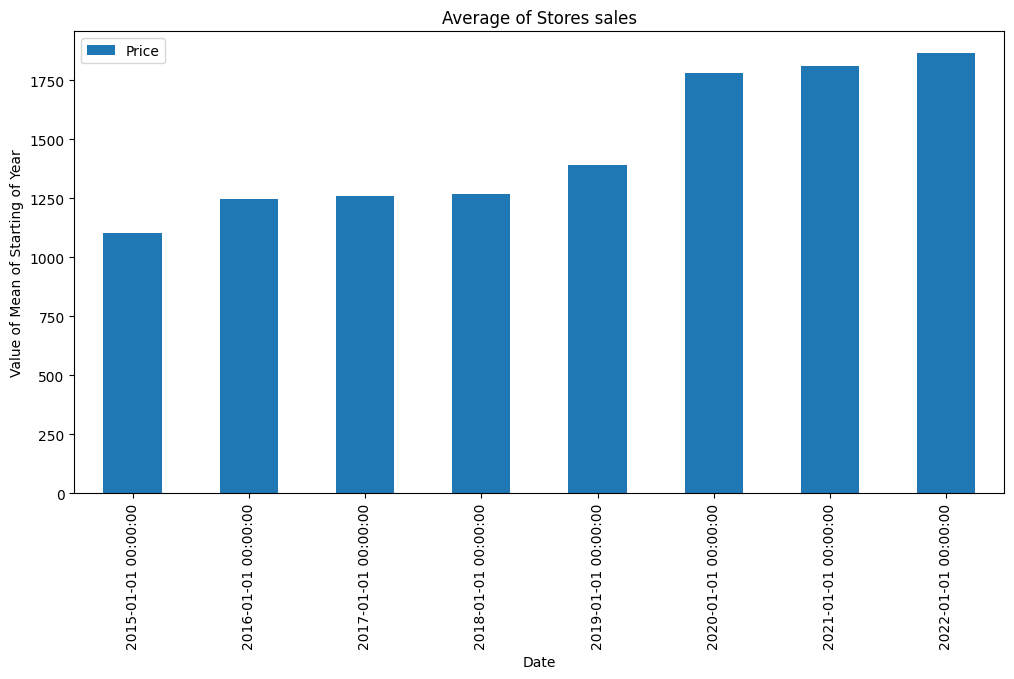

In [20]:


ax = df_1.resample(rule='AS').mean().plot.bar(figsize=(12,6))
ax.set(title='Average of Stores sales', ylabel='Value of Mean of Starting of Year')

In [21]:
df_1['USD_12M'] = df_1['Price'].rolling(window=365).mean()
df_1['USD_5Y'] = df_1['Price'].rolling(window=365*5+1).mean()

<ipython-input-21-fbaabd21ca1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['USD_12M'] = df_1['Price'].rolling(window=365).mean()
<ipython-input-21-fbaabd21ca1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['USD_5Y'] = df_1['Price'].rolling(window=365*5+1).mean()


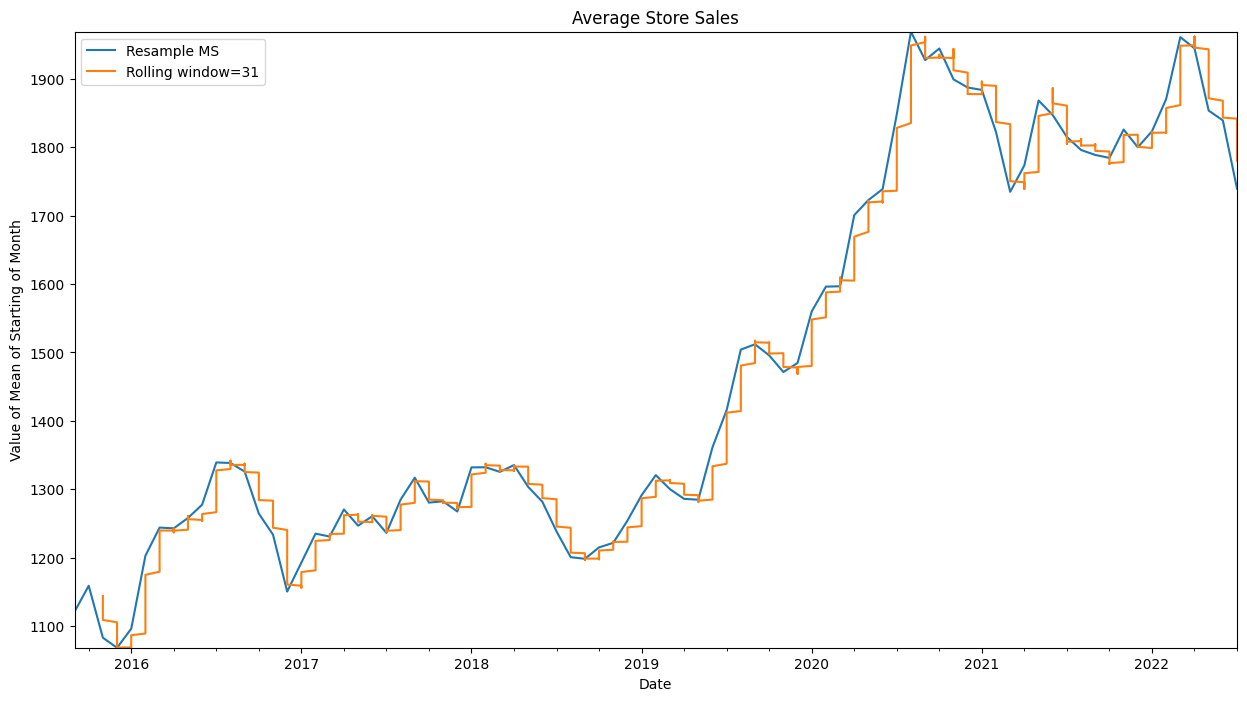

In [22]:
# Plot monthly resampled mean and rolling mean
ax = df_1['Price'].resample(rule='M').mean().plot(figsize=(15, 8), label='Resample MS')  # Monthly resampled mean
ax.autoscale(tight=True)
df_1.rolling(window=31).mean()['Price'].plot(label='Rolling window=31')  # 30-day rolling window/moving average

# Set labels and title
ax.set(ylabel='Value of Mean of Starting of Month', title='Average Store Sales')
ax.legend()

# Show plot
plt.show()


<Axes: xlabel='Date'>

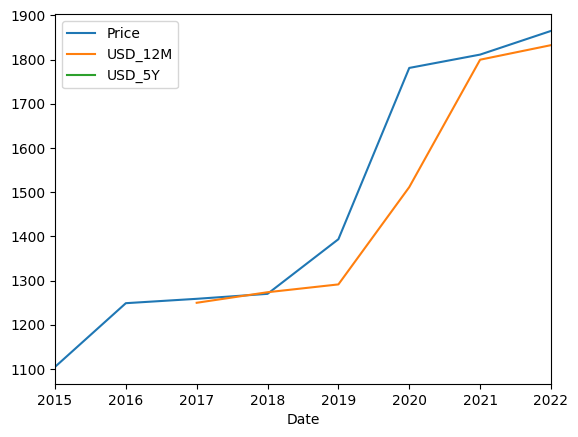

In [23]:
df_1.resample(rule='1y').mean().plot()

In [24]:
df_1.dtypes

,0
Price,float64
USD_12M,float64
USD_5Y,float64


In [25]:
df_1=df_1['Price']

In [26]:

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# metrics
from sklearn.metrics import mean_absolute_error

<Axes: >

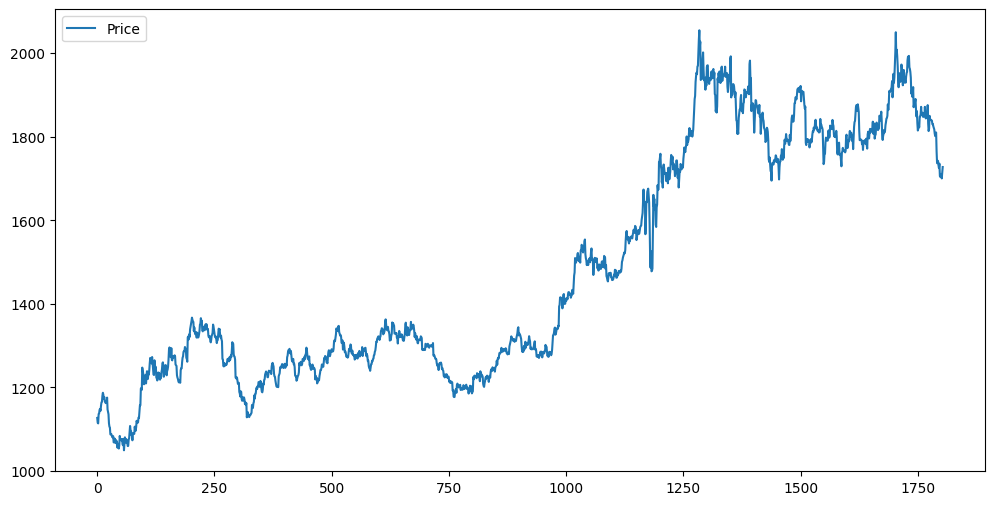

In [27]:
df[['Price']].plot(figsize=(12,6))

In [28]:
print(type(df_1.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [29]:
try:
    decompose_result = seasonal_decompose(df_varlist['Price'], model='multiplicative')
    decompose_result.plot()
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None


In [30]:
y= np.log(df_varlist['Price'])

In [31]:
y.name="Price"

In [32]:
seasonal_df = y.to_frame()
seasonal_df


,Price
Date,
2015-09-29,7.027403
2015-09-30,7.017058
2015-10-01,7.015712
2015-10-02,7.035885
2015-10-05,7.036764
...,...
2022-07-18,7.444366
2022-07-19,7.444658
2022-07-20,7.438501


In [33]:
seasonal_df["trend"] = seasonal_df["Price"].rolling(window=7, center=True).mean()
seasonal_df.head(10)

,Price,trend
Date,,
2015-09-29,7.027403,NaN
2015-09-30,7.017058,NaN
2015-10-01,7.015712,NaN
2015-10-02,7.035885,7.031929
2015-10-05,7.036764,7.034080
2015-10-06,7.044382,7.039150
2015-10-07,7.046299,7.045471
2015-10-08,7.042461,7.049021
2015-10-09,7.052548,7.054188


In [34]:
seasonal_df["detrended"] = seasonal_df["Price"]-seasonal_df["trend"]
seasonal_df.head(10)

,Price,trend,detrended
Date,,,
2015-09-29,7.027403,NaN,NaN
2015-09-30,7.017058,NaN,NaN
2015-10-01,7.015712,NaN,NaN
2015-10-02,7.035885,7.031929,0.003956
2015-10-05,7.036764,7.034080,0.002684
2015-10-06,7.044382,7.039150,0.005232
2015-10-07,7.046299,7.045471,0.000828
2015-10-08,7.042461,7.049021,-0.006560
2015-10-09,7.052548,7.054188,-0.001640


In [35]:
seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")
seasonal_df.head(15)



,Price,trend,detrended,month,seasonality
Date,,,,,
2015-09-29,7.027403,NaN,NaN,9,0.000130
2015-09-30,7.017058,NaN,NaN,9,0.000130
2015-10-01,7.015712,NaN,NaN,10,0.000001
2015-10-02,7.035885,7.031929,0.003956,10,0.000001
2015-10-05,7.036764,7.034080,0.002684,10,0.000001
2015-10-06,7.044382,7.039150,0.005232,10,0.000001
2015-10-07,7.046299,7.045471,0.000828,10,0.000001
2015-10-08,7.042461,7.049021,-0.006560,10,0.000001
2015-10-09,7.052548,7.054188,-0.001640,10,0.000001


In [36]:
seasonal_df = y.to_frame()

# calculate the trend component
seasonal_df["trend"] = seasonal_df["Price"].rolling(window=7, center=True).mean()

# detrend the series
seasonal_df["detrended"] = seasonal_df["Price"] - seasonal_df["trend"]

# calculate the seasonal component
seasonal_df.index = pd.to_datetime(seasonal_df.index)
seasonal_df["month"] = seasonal_df.index.month
seasonal_df["seasonality"] = seasonal_df.groupby("month")["detrended"].transform("mean")

# get the residuals
seasonal_df["resid"] = seasonal_df["detrended"] - seasonal_df["seasonality"]

# display the DF
seasonal_df.head(15)


,Price,trend,detrended,month,seasonality,resid
Date,,,,,,
2015-09-29,7.027403,NaN,NaN,9,0.000130,NaN
2015-09-30,7.017058,NaN,NaN,9,0.000130,NaN
2015-10-01,7.015712,NaN,NaN,10,0.000001,NaN
2015-10-02,7.035885,7.031929,0.003956,10,0.000001,0.003955
2015-10-05,7.036764,7.034080,0.002684,10,0.000001,0.002683
2015-10-06,7.044382,7.039150,0.005232,10,0.000001,0.005231
2015-10-07,7.046299,7.045471,0.000828,10,0.000001,0.000827
2015-10-08,7.042461,7.049021,-0.006560,10,0.000001,-0.006561
2015-10-09,7.052548,7.054188,-0.001640,10,0.000001,-0.001641


In [37]:
seasonal_df['trend']=np.exp(seasonal_df['trend'])
seasonal_df['seasonality']=np.exp(seasonal_df['seasonality'])
seasonal_df['resid']=np.exp(seasonal_df['resid'])

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

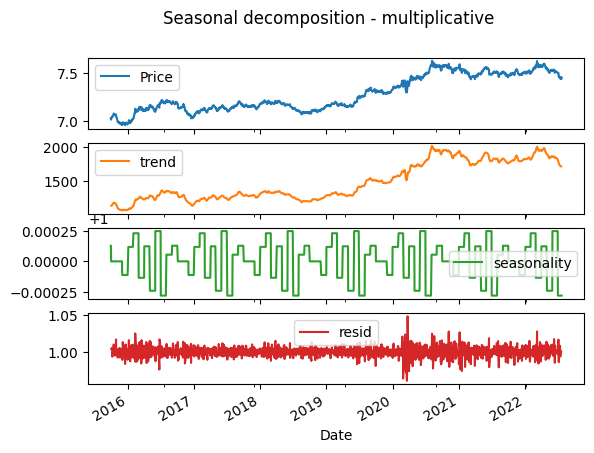

In [38]:
seasonal_df.loc[:, ["Price", "trend", "seasonality", "resid"]].plot(subplots=True, title="Seasonal decomposition - multiplicative")


In [39]:
!pip install statsmodels
import statsmodels.api as sm

AttributeError: 'Series' object has no attribute 'columns'

In [44]:
df_2=df_1["Price"]

In [45]:
df_2.head()

,Price
Date,
2015-09-29,1127.1
2015-09-30,1115.5
2015-10-01,1114.0
2015-10-02,1136.7
2015-10-05,1137.7


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: Val

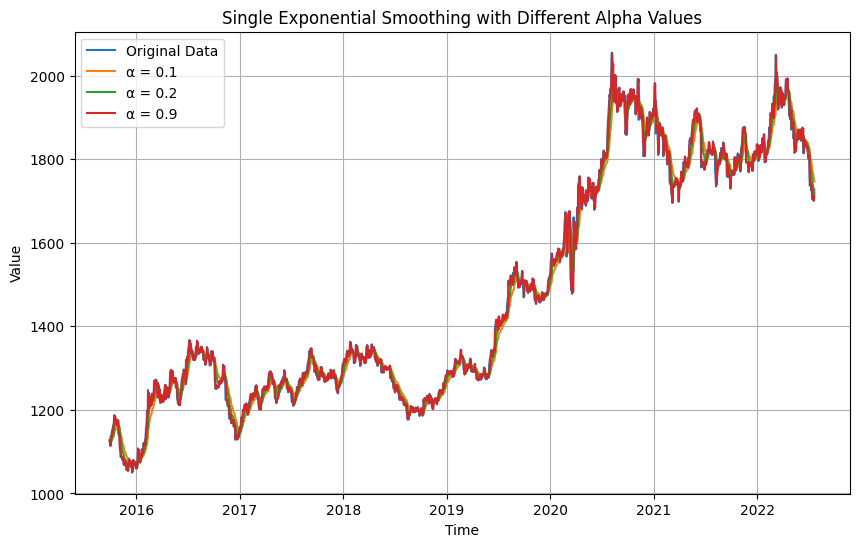

In [46]:
alphas = [0.1, 0.2,0.9]

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df_2, label='Original Data')

# Plot smoothed curves for different alphas
for alpha in alphas:
    model = SimpleExpSmoothing(df_2).fit(smoothing_level=alpha)
    smoothed_data = model.fittedvalues
    plt.plot(smoothed_data,label=r'α = {}'.format(alpha))

plt.title('Single Exponential Smoothing with Different Alpha Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [47]:
#double explonential smoothing

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


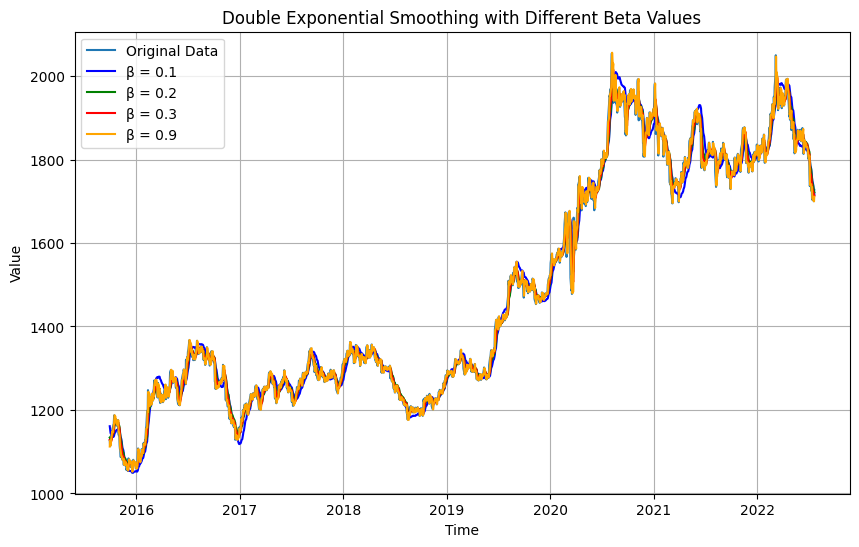

In [48]:
betas = [0.1, 0.2, 0.3, 0.9]

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(df_2, label='Original Data')

# Define colors for each beta value
colors = ['blue', 'green', 'red', 'orange']

# Plot smoothed curves for different betas with different colors
for beta, color in zip(betas, colors):
    model = ExponentialSmoothing(df_2, trend='add').fit(smoothing_level=beta)
    smoothed_data = model.fittedvalues
    plt.plot(smoothed_data, label=r'β = {}'.format(beta), color=color)


plt.title('Double Exponential Smoothing with Different Beta Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()